<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Pre-processamento/Tratamento_de_outliers%2C_discretiza%C3%A7%C3%A3o%2C_binariza%C3%A7%C3%A3o_e_pivotagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [ ]:
# numero de linhas e colunas do dataframe
df.shape

(4314, 9)

In [ ]:
# Estatitics sobre as variaveis numericas
df.describe()

,home_score,away_score
count,4314.000000,4314.000000
mean,2.324525,1.426750
std,2.784961,1.996946
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,24.000000,24.000000


In [ ]:
# Busca os campos desse dataframe
list(df)

['date',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'tournament',
 'city',
 'country',
 'neutral']

In [ ]:
# Busca valores unicos de uma coluna
df['home_team'].unique()

array(['Italy', 'Denmark', 'England', 'Thailand', 'Hong Kong',
       'New Zealand', 'Australia', 'Taiwan', 'Indonesia', 'Singapore',
       'Sweden', 'Northern Ireland', 'France', 'Switzerland', 'Wales',
       'India S', 'India N', 'Western Australia', 'India', 'Japan',
       'Finland', 'Norway', 'Iceland', 'Scotland', 'Belgium',
       'Netherlands', 'Republic of Ireland', 'Portugal', 'Germany',
       'Malaysia', 'Philippines', 'New Caledonia', 'Hungary', 'Spain',
       'China PR', 'Bulgaria', 'Czechoslovakia', 'Poland', 'North Korea',
       'Nigeria', 'Ghana', 'Canada', 'Haiti', 'United States',
       'Martinique', 'Trinidad and Tobago', 'Jamaica', 'Brazil', 'Chile',
       'Guinea', 'Papua New Guinea', 'Cameroon', 'Russia', 'Greece',
       'Romania', 'Yugoslavia', 'Lithuania', 'Ukraine', 'Latvia',
       'Slovenia', 'Slovakia', 'Croatia', 'Czech Republic', 'Mexico',
       'South Africa', 'Sierra Leone', 'Zambia', 'Argentina', 'Ecuador',
       'Angola', 'Austria', 'Uzbekist

In [ ]:
# Localiza partes do dataframe que cumpram a condição colocada
df.loc[df['country'] == 'Brazil'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
381,1991-04-28,Brazil,Chile,6,1,Copa América,Maringá,Brazil,False
383,1991-05-01,Chile,Venezuela,1,0,Copa América,Maringá,Brazil,True
385,1991-05-05,Brazil,Venezuela,6,11,Copa América,Maringá,Brazil,False
639,1995-01-08,Brazil,Ecuador,13,0,Copa América,Uberlândia,Brazil,False
640,1995-01-08,Chile,Bolivia,11,0,Copa América,Uberlândia,Brazil,True


In [ ]:
# Localiza partes do dataframe que cumpram a condição colocada, escondendo a palavra .LOC
df[df['country'] == 'Brazil'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
381,1991-04-28,Brazil,Chile,6,1,Copa América,Maringá,Brazil,False
383,1991-05-01,Chile,Venezuela,1,0,Copa América,Maringá,Brazil,True
385,1991-05-05,Brazil,Venezuela,6,11,Copa América,Maringá,Brazil,False
639,1995-01-08,Brazil,Ecuador,13,0,Copa América,Uberlândia,Brazil,False
640,1995-01-08,Chile,Bolivia,11,0,Copa América,Uberlândia,Brazil,True


In [ ]:
# Localiza partes do dataframe que cumpram a condição colocada utilizando operadores logicos 
# AND(&)
# OR (|)
# NOT (~)
df.loc[(df['country'] == 'Brazil') & (df['city'] == 'Rio de Janeiro')].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3526,2016-08-03,Sweden,South Africa,1,0,Olympic Games,Rio de Janeiro,Brazil,True
3527,2016-08-03,Brazil,China PR,3,0,Olympic Games,Rio de Janeiro,Brazil,False
3532,2016-08-06,South Africa,China PR,0,2,Olympic Games,Rio de Janeiro,Brazil,True
3533,2016-08-06,Brazil,Sweden,5,1,Olympic Games,Rio de Janeiro,Brazil,False
3548,2016-08-16,Brazil,Sweden,0,0,Olympic Games,Rio de Janeiro,Brazil,False


In [ ]:
# Localiza partes do dataframe que cumpram a condição colocada utilizando operadores logicos 
# AND(&)
# OR (|)
# NOT (~)
df.loc[(df['country'] == 'Brazil') & (df['city'] == 'Rio de Janeiro') & ~(df['home_team'] == 'Brazil')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3526,2016-08-03,Sweden,South Africa,1,0,Olympic Games,Rio de Janeiro,Brazil,True
3532,2016-08-06,South Africa,China PR,0,2,Olympic Games,Rio de Janeiro,Brazil,True
3551,2016-08-19,Sweden,Germany,1,2,Olympic Games,Rio de Janeiro,Brazil,True


In [ ]:
# Slice é um metodo que seleciona parte de uma string
df['date'].str.slice(start=0, stop=4, step=1)

0       1969
1       1969
2       1969
3       1969
4       1975
        ... 
4309    2022
4310    2022
4311    2022
4312    2022
4313    2022
Name: date, Length: 4314, dtype: object

In [ ]:
df.loc[(df['country'] == 'Italy') & (df['date'].str.slice(start=0, stop=4, step=1) == '2015')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3325,2015-09-18,Italy,Georgia,6,1,UEFA Euro qualification,La Spezia,Italy,False
3351,2015-10-24,Italy,Switzerland,0,3,UEFA Euro qualification,Cesena,Italy,False


In [ ]:
# Contagem simples
df[df['country'] == 'Brazil']['country'].count()

44

In [ ]:
# Contagem de registros unicos
df[df['country'] == 'Brazil']['city'].nunique()

8

In [ ]:
# Quantos gols o brazil fez em casa?
df[(df['country'] == 'Brazil') & (df['home_team'] == 'Brazil')]['home_score'].sum()

68

# Agrupamento

In [ ]:
# groupby
# Quantas vezes cada pais aparece?
df.groupby('country')['country'].count()

country
Albania                 14
Algeria                 10
Andorra                  2
Angola                   5
Antigua and Barbuda     10
                      ... 
United States          292
Vietnam                 69
Wales                   26
Zambia                  11
Zimbabwe                11
Name: country, Length: 144, dtype: int64

In [ ]:
# Quantos pontos em casa os Brazil fez sediando 
df.groupby('country')['home_team'].nunique()['Brazil']

15

In [ ]:
# Agrupamento multiplo
df.groupby(['country', 'city'])['country'].count()

country   city    
Albania   Elbasan      7
          Fier         1
          Shkodër      2
          Tirana       4
Algeria   Algiers      7
                      ..
Zambia    Chingola     1
          Lusaka       8
          Zambia       2
Zimbabwe  Harare      10
          Zimbabwe     1
Name: country, Length: 1015, dtype: int64

In [ ]:
# ordenação de dados
df.sort_values(by = 'home_score', ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1346,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
3044,2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
904,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
712,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
986,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False
...,...,...,...,...,...,...,...,...,...
1619,2003-09-27,Switzerland,Italy,0,1,UEFA Euro qualification,Frauenfeld,Switzerland,False
1620,2003-09-27,Serbia and Montenegro,Finland,0,1,UEFA Euro qualification,Subotica,Serbia and Montenegro,False
3277,2015-06-11,Canada,New Zealand,0,0,FIFA World Cup,Edmonton,Canada,False
1634,2003-10-02,China PR,Canada,0,1,FIFA World Cup,Portland,United States,True


In [ ]:
# Agrupamento multiplo com ordenação
df.groupby(['country', 'city'])['country'].count().sort_values(ascending=False)

country         city          
Portugal        Lagos             82
                Albufeira         67
                Parchal           60
Hong Kong       Hong Kong         57
China PR        Guangzhou         55
                                  ..
Portugal        Leiria             1
Cuba            Havana             1
Czech Republic  Brumov-Bylnice     1
Portugal        Fão                1
Zimbabwe        Zimbabwe           1
Name: country, Length: 1015, dtype: int64

In [ ]:
# Se eu quiser que o df esteja ordenado na memória e não só na visualização
df.sort_values(by = 'home_score', ascending=False, inplace=True)

In [ ]:
df.set_index(['date'],inplace = True)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False


In [ ]:
# Caso eu queira que o campo seja apagado passar o parametro drop = True
df.reset_index(inplace = True)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
1,2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
2,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
3,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
4,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False


# Amostragem

In [ ]:
# Criar uma amostra aleatória, em frac escolher q porcentagem em cima do total.
# random_state é a semente
df.sample(frac = 0.1, random_state = 2).shape

(431, 9)

In [ ]:
df_ams = df.sample(frac = 0.1, random_state = 2)
df_ams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3359,1980-01-12,India N,Taiwan,0,5,AFC Championship,Calicut,India,False
724,2006-05-04,Bermuda,Turks and Caicos Islands,4,0,CONCACAF Gold Cup,Dominican Republic,Dominican Republic,True
2592,2020-03-04,Germany,Sweden,1,0,Algarve Cup,Faro/Loulé,Portugal,True
208,1999-11-13,South Korea,Guam,8,0,AFC Championship,Philippines,Philippines,True
2709,2007-05-26,Northern Ireland,Czech Republic,1,3,UEFA Euro qualification,Coleraine,Northern Ireland,False


# Grafico

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


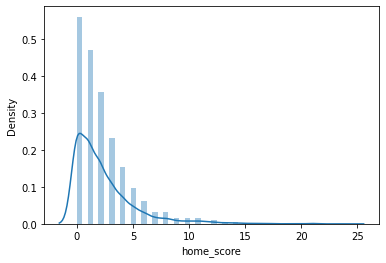

In [ ]:
# grafico de distribuição
sns.distplot(df['home_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


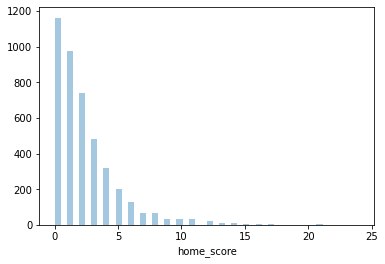

In [ ]:
# grafico de distribuição
sns.distplot(df['home_score'], kde = False)

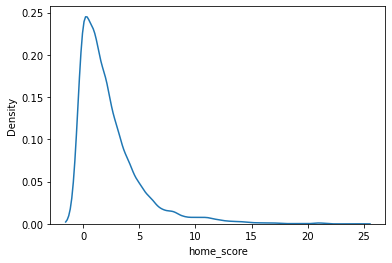

In [ ]:
# grafico de distribuição
sns.kdeplot(df['home_score'])

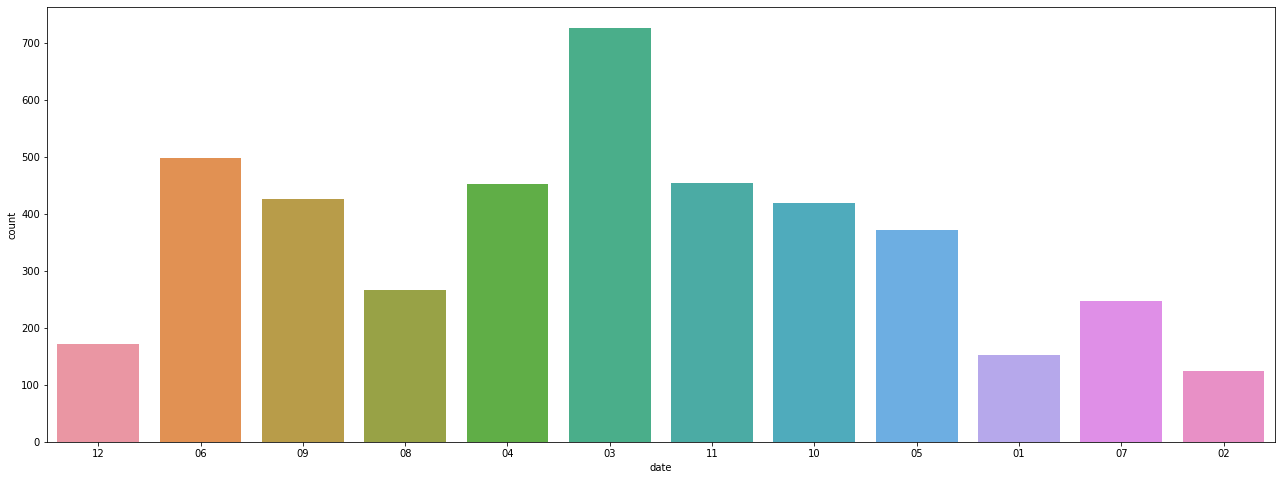

In [ ]:
plt.figure(figsize=[22,8])
sns.countplot(x=df['date'].str.slice(start=5, stop = 7, step = 1), data = df)

## Resolver valores ausentes
Algumas tecnicas de machine laerning (clusterizsação, modelagem supervisionada)

In [ ]:
### Excluir dados ausentes
#### para tornar a mudança real no df deve-se passar o parametro 'inplace=True'

#### ------- DIFICILMENTE EXCLUIR REGISTROS É UMA BOA SAIDA --------------
#### CONSEQUENCIAS: ficar sem dados para trabalhar | enviesando os dados (mais vies = menos qualidade)
df.dropna(axis=0)           # axis default, exclui linhas que tenham valores nulos
df.dropna(axis=0, thresh=4) # precisa ter no minimo 4 valores presentes

df.dropna(axis=1)           # exclui colunas que tenham valores nulos

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
1,2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
2,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
3,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
4,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False
...,...,...,...,...,...,...,...,...,...
4309,2003-09-27,Switzerland,Italy,0,1,UEFA Euro qualification,Frauenfeld,Switzerland,False
4310,2003-09-27,Serbia and Montenegro,Finland,0,1,UEFA Euro qualification,Subotica,Serbia and Montenegro,False
4311,2015-06-11,Canada,New Zealand,0,0,FIFA World Cup,Edmonton,Canada,False
4312,2003-10-02,China PR,Canada,0,1,FIFA World Cup,Portland,United States,True


In [ ]:
### Substituir valores por uma constante
#### para tornar a mudança real no df deve-se passar o parametro 'inplace=True'

df.fillna(value=0)                                # substituir por 0 os valores ausentes
df.fillna(value='Esse valor não está presente')   # substituir por 'Esse valor não está presente' os valores ausentes

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
1,2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
2,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
3,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
4,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False
...,...,...,...,...,...,...,...,...,...
4309,2003-09-27,Switzerland,Italy,0,1,UEFA Euro qualification,Frauenfeld,Switzerland,False
4310,2003-09-27,Serbia and Montenegro,Finland,0,1,UEFA Euro qualification,Subotica,Serbia and Montenegro,False
4311,2015-06-11,Canada,New Zealand,0,0,FIFA World Cup,Edmonton,Canada,False
4312,2003-10-02,China PR,Canada,0,1,FIFA World Cup,Portland,United States,True


In [ ]:
### Substituir valores por uma variavel

df.fillna(value=df['home_score'].mean())          # substituir pela média dos valores presentes


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
1,2013-06-07,Jordan,Kuwait,21,0,AFC Asian Cup qualification,Amman,Jordan,False
2,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
3,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
4,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False
...,...,...,...,...,...,...,...,...,...
4309,2003-09-27,Switzerland,Italy,0,1,UEFA Euro qualification,Frauenfeld,Switzerland,False
4310,2003-09-27,Serbia and Montenegro,Finland,0,1,UEFA Euro qualification,Subotica,Serbia and Montenegro,False
4311,2015-06-11,Canada,New Zealand,0,0,FIFA World Cup,Edmonton,Canada,False
4312,2003-10-02,China PR,Canada,0,1,FIFA World Cup,Portland,United States,True


## Tratamento de outliers
#### Outliers são valores que fogem do padrão dos outros valores.
#### Alguns ocorrem por realmente ser um ponto fora da curva.
#### Outros ocorrem por erro.
#### **Como resolver**:
#### - **Não tratar**: Caso va utilizar uma tecnica de ML que seja pouco sensivel a eles
#### - **Remove-los ou substitui-los**: Quando injetam incerteza nos resultados

In [ ]:
dfPesoAltura = pd.read_csv('PESOS_ALTURAS.csv')     # Importando dados
dfPesoAltura.head()                                 # Espiando os dados

,ID_PESSOA,PESO,ALTURA
0,1,68,168
1,2,67,173
2,3,70,174
3,4,68,172
4,5,73,168


In [ ]:
dfPesoAltura[['ALTURA', 'PESO']].mean()          # Visualizando a média dos pesos e alturas

## Observa-se que os valores estão longe de um valor que possa ser um peso ou altura
## Pode ter OUTLIERS

ALTURA    203.358
PESO      778.674
dtype: float64

In [ ]:
dfPesoAltura.sort_values(by='PESO')          # Ordenando os pesos
## percebe-se pesos zerados!

,ID_PESSOA,PESO,ALTURA
591,592,0,169
750,751,0,170
651,652,0,171
62,63,60,170
659,660,62,170
...,...,...,...
55,56,78,170
508,509,78,167
757,758,80,169
730,731,7100,169


In [ ]:
dfPesoAltura.sort_values(by='PESO', ascending = False)          # Ordenando os pesos desc
## percebe-se pesos com valores absurdos!

,ID_PESSOA,PESO,ALTURA
758,759,701908,171
730,731,7100,169
757,758,80,169
51,52,78,169
55,56,78,170
...,...,...,...
659,660,62,170
62,63,60,170
750,751,0,170
651,652,0,171


In [ ]:
dfPesoAltura.sort_values(by='ALTURA')          # Ordenando altura
## percebe-se alturas menores que 30 cm!

,ID_PESSOA,PESO,ALTURA
739,740,73,1
723,724,67,15
653,654,67,17
682,683,65,163
709,710,68,164
...,...,...,...
214,215,71,176
401,402,68,177
114,115,69,178
436,437,68,16300


In [ ]:
dfPesoAltura.sort_values(by='ALTURA', ascending = False)          # Ordenando altura desc
## percebe-se alturas absurdas!

,ID_PESSOA,PESO,ALTURA
414,415,69,17809
436,437,68,16300
114,115,69,178
401,402,68,177
366,367,71,176
...,...,...,...
242,243,73,164
682,683,65,163
653,654,67,17
723,724,67,15


Para tratar isso utilizeremos quartil:

**REMOVENDO VALORES:**

In [ ]:
## Removendo alturas fora da margem de 0.3% - 99.8%
dfPesoAltura = dfPesoAltura[
             (dfPesoAltura['ALTURA'] > dfPesoAltura['ALTURA'].quantile(0.003)) &
             (dfPesoAltura['ALTURA'] < dfPesoAltura['ALTURA'].quantile(0.998))
]
dfPesoAltura['ALTURA'].mean()


170.07070707070707

In [ ]:
## Removendo peso fora da margem de 0.3% - 99.8%
dfPesoAltura = dfPesoAltura[
             (dfPesoAltura['PESO'] > dfPesoAltura['PESO'].quantile(0.003)) &
             (dfPesoAltura['PESO'] < dfPesoAltura['PESO'].quantile(0.998))
]
dfPesoAltura['PESO'].mean()


70.02944162436548

**SUBSTITUINDO VALORES:**

In [ ]:
dfPesoAltura = pd.read_csv('PESOS_ALTURAS.csv')     # Importando dados

## Substituindo alturas fora da margem de 0.3% - 99.8%
dfPesoAltura[
             (dfPesoAltura['ALTURA'] < dfPesoAltura['ALTURA'].quantile(0.003)) |
             (dfPesoAltura['ALTURA'] > dfPesoAltura['ALTURA'].quantile(0.998))
] = dfPesoAltura[
             (dfPesoAltura['ALTURA'] > dfPesoAltura['ALTURA'].quantile(0.003)) &
             (dfPesoAltura['ALTURA'] < dfPesoAltura['ALTURA'].quantile(0.998))
].mean()
dfPesoAltura['ALTURA'].mean()

170.06633165829146

In [ ]:
import numpy as np   # Importando numpy para substituir outliers por media

dfPesoAltura = pd.read_csv('PESOS_ALTURAS.csv')     # Importando dados


In [ ]:
dfPesoAltura['ALTURA'] = np.where((dfPesoAltura['ALTURA'] < dfPesoAltura['ALTURA'].quantile(0.003)) | 
          (dfPesoAltura['ALTURA'] > dfPesoAltura['ALTURA'].quantile(0.998)),
          dfPesoAltura[(dfPesoAltura['ALTURA'] > dfPesoAltura['ALTURA'].quantile(0.003)) & 
                       (dfPesoAltura['ALTURA'] < dfPesoAltura['ALTURA'].quantile(0.998))]['ALTURA'].mean(),
          dfPesoAltura['ALTURA'])

In [ ]:
dfPesoAltura['ALTURA'].mean()

170.06633165829146

In [ ]:
dfPesoAltura = pd.read_csv('PESOS_ALTURAS.csv')     # Importando dados

## Substituindo alturas fora da margem de 0.3% - 99.8%
dfPesoAltura[
             (dfPesoAltura['PESO'] < dfPesoAltura['PESO'].quantile(0.003)) |
             (dfPesoAltura['PESO'] > dfPesoAltura['PESO'].quantile(0.998))
] = dfPesoAltura[
             (dfPesoAltura['PESO'] > dfPesoAltura['PESO'].quantile(0.003)) &
             (dfPesoAltura['PESO'] < dfPesoAltura['PESO'].quantile(0.998))
].mean()
dfPesoAltura['PESO'].mean()

70.01608040201006

## Discretização
transformar valores numericos em categóticos. Algumas tecnicas de ML precisam de valores categóricos

In [ ]:
## Abordagem de divisão de largura igual (não supervisionado)
## utilizando percentil
## NÃO UTILIZA-LA QUANDO TIVER OUTLIERS OU COM DADOS MUITO ASSIMÉTRICOS

In [ ]:
#@title Texto de título padrão
# PODEMOS CRIAR FUNÇÕES PARA DISCRETIZAR

# PESO
def discrPeso(x):
    if x < dfPesoAltura['PESO'].quantile(0.2):
        return 'MUITO BAIXO'
    elif x < dfPesoAltura['PESO'].quantile(0.4):
        return 'BAIXO'
    elif x < dfPesoAltura['PESO'].quantile(0.6):
        return 'MÉDIO'
    elif x < dfPesoAltura['PESO'].quantile(0.8):
        return 'ALTO'   
    else:
        return 'MUITO ALTO'

# ALTURA
def discrAltura(x):
    if x < dfPesoAltura['ALTURA'].quantile(0.2):
        return 'MUITO BAIXO'
    elif x < dfPesoAltura['ALTURA'].quantile(0.4):
        return 'BAIXO'
    elif x < dfPesoAltura['ALTURA'].quantile(0.6):
        return 'MÉDIO'
    elif x < dfPesoAltura['ALTURA'].quantile(0.8):
        return 'ALTO'   
    else:
        return 'MUITO ALTO'

In [ ]:
# APLCIANDO AS FUNÇÕES...
dfPesoAltura['DESC_PESO']   = dfPesoAltura['PESO'].apply(discrPeso)
dfPesoAltura['DESC_ALTURA'] = dfPesoAltura['ALTURA'].apply(discrAltura)

In [ ]:
# PRONTO! AGORA TEMOS PESOS E ALTURAS CATEGÓRICAS
dfPesoAltura.head(5)

,ID_PESSOA,PESO,ALTURA,DESC_PESO,DESC_ALTURA
0,1.0,68.0,168.0,BAIXO,BAIXO
1,2.0,67.0,173.0,MUITO BAIXO,MUITO ALTO
2,3.0,70.0,174.0,MÉDIO,MUITO ALTO
3,4.0,68.0,172.0,BAIXO,MUITO ALTO
4,5.0,73.0,168.0,MUITO ALTO,BAIXO


## Binarização

Parte dos algoritmos de machine learning admitem apenas campos (atributos) numéricos.
Porém, parte dos dados que queremos usar podem ser categóricos. Nesse contexto, podemos transforma-los usando a codificação one-hot.
Consiste em "binarizar" aqueles campos que estão em formato categórico, onde cada categoria do campo se transforma em um campo novo, binarizado.
No Python, o método get_dummies da biblioteca pandas é o mais comum para esse trabalho. 

In [ ]:
dfRh = pd.read_csv('RH_DATASET.csv')
dfRh.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [ ]:
dfRh[['Divorced', 'Married', 'Separated', 'Single', 'widowed']] = pd.get_dummies(dfRh['MaritalDesc'])
dfRh.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Position,Pay Rate,Manager Name,Employee Source,Performance Score,Divorced,Married,Separated,Single,widowed
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,0,1,0,0,0
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,1,0,0,0,0
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets,0,0,0,1,0
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,0,1,0,0,0
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,0,0,0,1,0


## Pivotagem

In [ ]:
# VAMOS IMPORTAR UM DATASET PARA EXEMPLIFICAR...
dfVoos = sns.load_dataset('flights')
dfVoos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# USANDO A pivot_table DO PANDAS PARA TRANSPOR OS DADOS

dfVoosPivot = dfVoos.pivot_table(values = 'passengers', 
                         index = 'month', 
                         columns = 'year')
dfVoosPivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


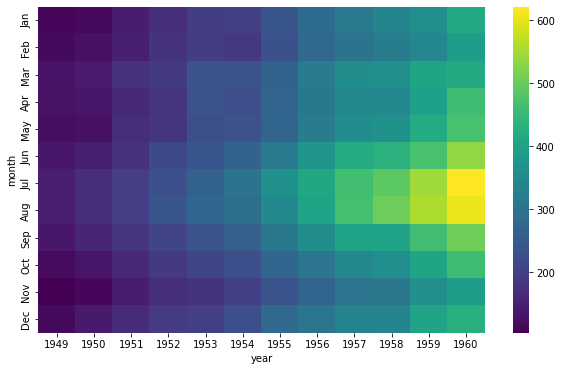

In [ ]:
# MAPA DE CALOR DA TABELA PIVOTADA
plt.figure(figsize=[10,6])
sns.heatmap(dfVoosPivot, cmap='viridis')